### Exercise 4: comparison of QED results with experimental data from LEP


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True

In [55]:
#some physical constants
hbar = 	6.582119569e-16 #eV*s
alpha=1/137
c=2.99792458e8

The function that takes an interval $\Delta \cos \theta=[u_0, u_1]$ and gives the differential cross section  integrated over that range is :
$$ \frac{\pi \alpha^2}{2E^2}\Bigg( - u + \ln\left(\frac{1+u}{1-u}\right)\Bigg)_{u_0}^{u_1}$$
where $u=\cos \theta$

In [68]:
prefactor=np.pi*alpha**2 * hbar**2 * c**2 /2 #resurrect hbar and c
def f(u):
    return -u+np.log( (1+u) / (1-u) )
def differentialCrossSection(E, ulow, uhigh):
    solid_angle=2*np.pi*(uhigh-ulow)
    integrated_cross_section=prefactor/E**2 *( f(uhigh) - f(ulow) )*1e40 # (1pb=10^{-40} m^2)
    return integrated_cross_section/solid_angle

In [153]:
tab_8 = pd.read_csv("table8.csv")
lows=tab_8['costheta_low'].values
highs=tab_8['costheta_high'].values
sqrt_s=195.6e9#eV
#s=4E^2-->E^2=s/4-->E=sqrt(s)/2
E_avg=sqrt_s/2#eV

The result from the formula derived in the exercise is (with no surprise) the theoretical 
prediction reported in the last column of table 8 in the paper: 

In [98]:
dcs=differentialCrossSection(E_avg, lows, highs)
print("exercise, paper")
for i, cs in enumerate(dcs):
    print(f"{cs:.2f}, {tab_8['cs_theo'].values[i]:.2f}")

exercise, paper
0.55, 0.55
0.56, 0.56
0.57, 0.57
0.59, 0.59
0.62, 0.62
0.66, 0.66
0.71, 0.71
0.77, 0.77
0.84, 0.84
0.93, 0.93
1.05, 1.05
1.21, 1.21
1.40, 1.40
1.64, 1.64
3.18, 3.18
4.49, 4.48


In [154]:
#I can also reproduce figure 3 (top)
x_grid=np.linspace(0,0.91,2000)
lows_grid=x_grid[::2]
highs_grid=x_grid[1::2]
x_exp=(lows+highs)/2
x_grid=(lows_grid+highs_grid)/2
y_theoretical=differentialCrossSection(E_avg, lows_grid, highs_grid)
y_exp=tab_8['cs_measured']
sigma=np.sqrt(tab_8['stat_unc']**2 + tab_8['sist_unc'])

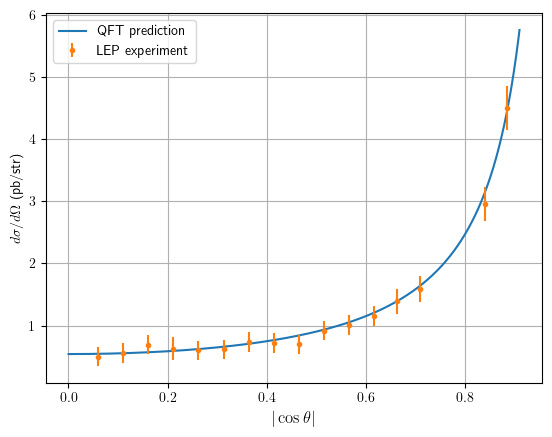

In [155]:
plt.plot(x_grid,y_theoretical, label="QFT prediction")
plt.errorbar(x, y_exp, yerr=sigma,linestyle='', marker='.', label="LEP experiment")
plt.xlabel("$|\\cos\\theta|$", fontsize=12)
plt.ylabel("$d\\sigma/d\\Omega$ (pb/str)")
plt.grid(visible=True)
lg=plt.legend()

Now I compare with table 9:

In [156]:
tab_9=pd.read_csv("table9.csv")
E=tab_9['s'].values*1e9/2# s is actually sqrt(s)
#these are intervals given in the description of table 9:
low1=0.035
high1=0.731
low2=0.819
high2=0.906
#I multiply back by the solid angle to get the total cross section
cs_theo=2*np.pi*(differentialCrossSection(E, low1, high1)*(high1-low1)+ differentialCrossSection(E, low2, high2)*(high2-low2))

Again we can see the result are the same as the theoretical values of the paper.

In [157]:
print(cs_theo)

[8.57039289 7.53724396 6.68024471 6.26882418 6.07405132 5.83412786
 5.60252323 5.48641191 5.2698819  5.23927278]


In [158]:
sigma=np.sqrt(tab_9['sis_unc']**2 + tab_9['stat_unc']**2)
SQRT_S_GRID=np.linspace(160, 210)
energy_grid=SQRT_S_GRID*1e9/2
cs_theo_grid=2*np.pi*(differentialCrossSection(energy_grid, low1, high1)*(high1-low1)+ differentialCrossSection(energy_grid, low2, high2)*(high2-low2))

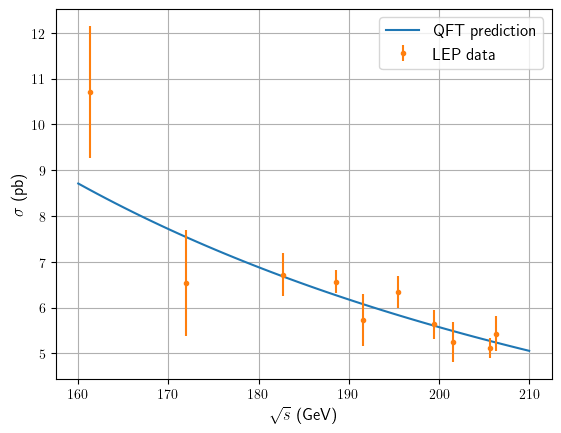

In [152]:
plt.figure()
plt.plot(SQRT_S_GRID, cs_theo_grid, label='QFT prediction')
plt.errorbar(tab_9['s'], tab_9['cs_exp'], yerr=sigma, linestyle='', label='LEP data', marker='.')
plt.xlabel("$\\sqrt{s}$ (GeV)", fontsize=12)
plt.ylabel("$\\sigma$ (pb)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(visible=True)